# <center>Miniproyecto 8</center>
## <center>Modelación y Simulación</center>
<center>Javier Anleu Alegría - 17149</center>

<center>Andrea Argüello - 17801</center>

**Librerías**

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from IPython.display import display, Latex

## Ejercicio 1: Markov
Construya un programa de simulación, en su lenguaje favorito, para generar el estado en el paso $k$ de una cadena de Markov  con transiciones estacionarias y número de estados finitos dado un estado inicial, muestre los diferentes estados hasta la generación del estado en el paso $k$.

### Resolución

La cadena de Markov que se simulará será una variable aleatoria de Bernoulli $X$, con estados $\mathscr{S} = \{0,1\}$. La matriz de probabilidades de la variable aleatoria tendrá, por lo tanto, $i = 2$ filas con $j=2$ columnas. Dada la probabilidad $p_1$ de que $X$ se mantenga en el estado $i = 0$ si se encuentra en ese estado, y la probabilidad $p_2$ de que $X$ se mantenga en el estado $i = 1$ si se encuentra en ese estado, entonces las probabilidades de cambio de estado, respectivamente, son $1-p_1$ y $1-p_2$. Matemáticamente, para un estado presente $n$ y un estado siguiente futuro $n+1$:

$$P\Big(X_{n+1} = 0| X_n = 0\Big) = p_1$$
$$P\Big(X_{n+1} = 1| X_n = 1\Big) = p_2$$
$$P\Big(X_{n+1} = 1| X_n = 0\Big) = 1 - p_1$$
$$P\Big(X_{n+1} = 0| X_n = 1\Big) = 1 - p_2$$

Por consiguiente, la matriz de probabilidades para la cadena de Markov es:

$$\mathrm{P} = \begin {bmatrix} p_1 & {1-p_1} \\ p_2 & {1-p_2} \end{bmatrix}$$

Para la simulación, se utilizará el método de la transformada inversa para la variable aleatoria $X$ de Bernoulli utilizando la distribución continua uniforme estándar $\mathscr{U} (0,1)$. Para cada transición de estado, se utilizarán las probabilidades descritas en la fila $i$ de la matriz $\mathrm{P}$ que corresponde al estado presente de $X$. El estado inicial de la variable aleatoria será $X_0 = 0$, y se realizará la simulación para $k$ pasos.

### Simulación

Función para la transformada inversa de la variable aleatoria de Bernoulli para la cadena de Markov:

In [2]:
def bernoulliInv(u, x, p):
    if u<=p:
        return x
    else:
        if x == 1:
            return 0
        else:
            return 1

Configuración del *seed*:

In [3]:
random.seed(np.pi)

Parámetros de la simulación:

* `k`: el número de pasos que se realizarán en la simulación
* `p_1`: la probabilidad de que la variable aleatoria $X$ de Bernoulli se mantenga en el estado $i = 0$
* `p_2`: la probabilidad de que la variable aleatoria $X$ de Bernoulli se mantenga en el estado $i = 1$

In [4]:
k = 10
p_1 = 0.3
p_2 = 0.4

**Corrida:**

In [5]:
# Lista de probabilidades
P = [p_1, p_2]

# Estado inicial de la variable aleatoria
X = 0
display(Latex('$X_0 = '+str(X)+'$'))

for i in range(k):
    u = random.uniform(0,1)
    X = bernoulliInv(u, X, P[X])
    display(Latex('$X_{'+str(i+1)+'} = '+str(X)+'$'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Ejercicio 2: Metropolis-Hastings

Utilice el algoritmo de Metrópolis-Hastings para generar los valores de una variable normal estándar $N(0,1)$, sea $q(X_{n+1},X_n)$ definido como $X_{n+1}=X_n+e$ donde los valores de $e$ se generan de una variable aleatoria $G$ con $g$ función de densidad de probabilidad simétrica en $0$. Además, $q(x,y)=g(e)$.
Realice el histograma con los $10,000$ valores resultantes.

### Resolución 

La función de densidad de probabilidad $g$ será una distribución continua uniforme definida en $[-\delta, \delta]$, donde $\delta \geq 0$, tal que está centrada en $0$. 

$$g = \mathscr{U} (-\delta, \delta)$$

Dado 

$$\alpha (X_{n+1}|X_n) = \frac{\pi(X_{n+1})q(X_n|X_{n+1})}{\pi(X_n)q(X_{n+1}|X_n)} = \frac{\pi(X_{n+1})}{\pi(X_n)}$$

Ya que se desea aproximar la distribución normal estándar, por lo tanto, $\alpha (X_{n+1}|X_n)$ se determinará de la siguiente manera:

$$\alpha(X_{n+1}|X_n) = \frac{\varphi(X_{n+1})}{\varphi(X_n)}$$
Donde $\varphi$ corresponde a la densidad de la distribución normal estándar:

$$\varphi(z) = \frac{e^{\frac{-z^2}{2}}}{\sqrt{2\pi}}$$

Para realizar la simulación, se generará la variable $e$ a partir de la distribución continua uniforme $g$. Por cada iteración, se generará un valor $y$ tal que $y = x + e$, donde $x$ es el estado presente de la variable aleatoria. Seguidamente, se generará un número $u$ a partir de la distribución continua uniforme $\mathscr{U} (0,1)$, y dado el siguiente criterio, se aceptará o rechazará el valor de $y$ generado en la iteración:


$$\text{Si } u \leq \alpha(X_{n+1}|X_n) \rightarrow \text{se acepta } y \text{ y se agrega a la muestra.}$$
$$\text{Si } u > \alpha(X_{n+1}|X_n) \rightarrow \text{se rechaza } y \text{ y se agrega } x \text{ a la muestra.}$$

El algoritmo se correrá por $N = 10,000$ iteraciones, y el valor inicial de la simulación será $X_0 = 0$.

### Simulación

Función de densidad de la distribución normal estándar $N(0,1)$:

In [6]:
normalPDF = lambda z: np.exp((-1*z**2)/2)/((2*np.pi)**0.5)

Función para determinar $\alpha(X_{n+1}|X_n)$:

In [7]:
alphaX = lambda x_n, x_n1: normalPDF(x_n1)/normalPDF(x_n)

Configuración del *seed*:

In [8]:
random.seed(777)

Parámetros de la simulación:
* `N`: el número de iteraciones de la simulación
* `delta`: el parámetro de la función $g$

In [9]:
N = 10**4
delta = 0.5

**Corrida:**

In [10]:
# Valor inicial
X = [0]

for i in range(N-1):
    e = random.uniform(-delta, delta)
    X_n = X[i]
    X_n1 = X_n + e
    u = random.uniform(0,1)
    alpha = alphaX(X_n, X_n1)
    if u <= alpha:
        X.append(X_n1)
    else:
        X.append(X_n)

**Histograma de la distribución generada:**

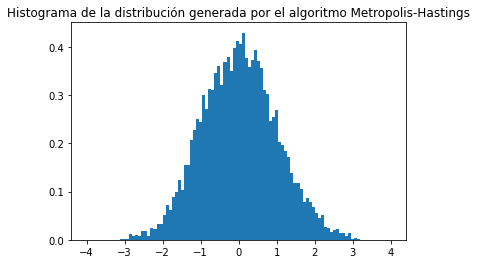

In [11]:
plt.hist(X, bins = int(np.round(N**0.5)), density = True, range = [-4,4])
plt.title("Histograma de la distribución generada por el algoritmo Metropolis-Hastings")
plt.show()

### Alternativa

Alternativamente, el valor de $\alpha(X_{n+1}|X_n)$ puede calcularse de la siguiente manera: 

Dado 

$$\alpha (X_{n+1}|X_n) = \min \Big\{\frac{\pi(X_{n+1})q(X_n|X_{n+1})}{\pi(X_n)q(X_{n+1}|X_n)} , 1\Big\} = \min \Big\{\frac{\pi(X_{n+1})}{\pi(X_n)} , 1\Big\}$$

Ya que se desea aproximar la distribución normal estándar, por lo tanto, $\alpha (X_{n+1}|X_n)$ se determinará de la siguiente manera:

$$\alpha(X_{n+1}|X_n) = \min \Big\{\frac{\varphi(X_{n+1})}{\varphi(X_n)}, 1\Big\}$$

Donde $\varphi$ corresponde a la densidad de la distribución normal estándar:

$$\varphi(z) = \frac{e^{\frac{-z^2}{2}}}{\sqrt{2\pi}}$$

La simulación se realizará de la misma manera que la anterior, con la excepción del cálculo del valor de $\alpha (X_{n+1}|X_n)$. El algoritmo se correrá por $N = 10,000$ iteraciones, y el valor inicial de la simulación será $X_0 = 0$.

### Simulación

Función para determinar $\alpha(X_{n+1}|X_n)$:

In [12]:
alphaXAlt = lambda x_n, x_n1:min([normalPDF(x_n1)/normalPDF(x_n),1])

Configuración del *seed*:

In [13]:
random.seed(777)

Parámetros de la simulación:
* `N`: el número de iteraciones de la simulación
* `delta`: el parámetro de la función $g$

In [14]:
N = 10**4
delta = 0.5

**Corrida:**

In [15]:
# Valor inicial
X = [0]

for i in range(N-1):
    e = random.uniform(-delta, delta)
    X_n = X[i]
    X_n1 = X_n + e
    u = random.uniform(0,1)
    alpha = alphaXAlt(X_n, X_n1)
    if u <= alpha:
        X.append(X_n1)
    else:
        X.append(X_n)

**Histograma de la distribución generada:**

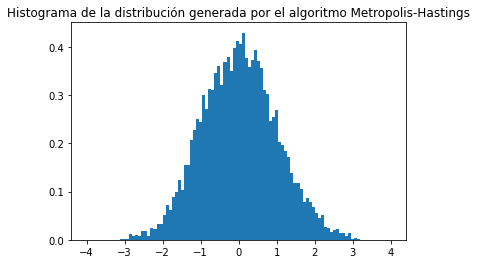

In [16]:
plt.hist(X, bins = int(np.round(N**0.5)), density = True, range = [-4,4])
plt.title("Histograma de la distribución generada por el algoritmo Metropolis-Hastings")
plt.show()

## Ejercicio 3: Muestreador de Gibbs utilizando Metropolis-Hastings

Cabe mencionar que el muestreador de Gibss es un caso especial de Hastings-Metropolis, en el cual la distribución que se desea muestrear es multivariable. El punto del muestreo de Gibbs es que es más simple el muestrear de una distribución condicional que de una conjunta. Además, la función de aceptación es igual a 1 para el muetreo de Gibbs, lo cual se demuestra a continuación:

$$\alpha (x_j^{cand}, x_{-j}^{(i-1)}|x_j^{(i-1)}, x_{-j}^{(i-1)}) = \min \Big\{\frac{p(x_j^{cand}, x_{-j}^{(i-1)})q(x_j^{(i-1)}, x_{-j}^{(i-1)}|x_j^{cand}, x_{-j}^{(i-1)})}{p(x_j^{(i-1)}, x_{-j}^{(i-1)})q(x_j^{cand}, x_{-j}^{(i-1)}|x_j^{(i-1)}, x_{-j}^{(i-1)})} , 1\Big\}$$

Donde $x_{-j}$ denota a todos los $x$ con subíndice distinto de $j$. Nótese que $p(x_j^{(i)} | x_1^{(i)}, ..., x_{j-1}^{(i)}, x_j^{(i-1)}, ..., x_n^{(i-1)})=\frac{p(x_1, ..., x_n)}{p(x_1, ..., x_{j-1}, x_{j+1}, ..., x_n)} \alpha p(x_1, ..., x_n)$. Es decir, propongamos que $q(x_j^{(i-1)}, x_{-j}^{(i-1)}|x_j^{cand}, x_{-j}^{(i-1)}) = p(x_j^{(i-1)}|x_{-j}^{(i-1)})$. Además, por regla de la cadena, $p(x_j^{cand}, x_{-j}^{(i-1)})=p(x_j^{cand} | x_{-j}^{(i-1)})p(x_{-j}^{(i-1)})$. Entonces, sustituyendo, se tiene que:

$$\alpha (x_j^{cand}, x_{-j}^{(i-1)}|x_j^{(i-1)}, x_{-j}^{(i-1)}) = \min \Big\{ \frac{p(x_j^{cand} | x_{-j}^{(i-1)})p(x_{-j}^{(i-1)})p(x_j^{(i-1)}|x_{-j}^{(i-1)})}{p(x_j^{cand} | x_{-j}^{(i-1)})p(x_{-j}^{(i-1)})p(x_j^{(i-1)}|x_{-j}^{(i-1)})},1\Big\}=1$$

Suponga que deseamos obtener $k$ muestras de $X=(x_1, ..., x_n)$ de una distribución conjunta $p(x_1, ... , x_n)$. Denotemos la i-ésima muestra $X^{(i)}=(x_1^{(i)}, ... , x_n^{(i)})$

### Pseudocódigo del algoritmo general
1. Defínase el valor inicial $X^{(0)}$
2. ``for i=1; i<k; i++:``
    1. $X^{(i)}$ = lista de tamaño n-1
    2. ``for j=1; j<n; j++:``
        1. $x_j^{(i)} = p(x_j^{(i)} | x_1^{(i)}, ..., x_{j-1}^{(i)}, x_j^{(i-1)}, ..., x_n^{(i-1)})$
        2. $X^{(i)}$[ j-1 ]=$x_j^{(i)}$
        
Nótese que esto es equivalente a utilizar Hastings-Metropolis con $\alpha=1$ y $q= p(x_j^{(i)} | x_1^{(i)}, ..., x_{j-1}^{(i)}, x_j^{(i-1)}, ..., x_n^{(i-1)})$

### Pseudocódigo utilizando Metropolis-Hastings
1. Defínase ``MetropolisHastings(alfa, x_i1)``, donde ``x_i1`` es $X^{(i-1)}$, con $q= p(x_j^{(i)} | x_1^{(i)}, ..., x_{j-1}^{(i)}, x_j^{(i-1)}, ..., x_n^{(i-1)})$, la cual genere ``len(x_i1)`` $x_j$ y retorne al final una lista $X^{(i)}$
2. Definir $X^{(0)}$ 
3. Definir ``lasX=[``$X^{(0)}$ ``]``
4. Llamar a ``lasX.append(MetropolisHastings(1, lasX[i]))`` y para i entre 0 y k-1, nótese que ``lasX[i]`` es igual a $X^{(i)}$